<a href="https://colab.research.google.com/github/Pratiksakpal/Python-Projects/blob/main/Capstone_Project_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Assuming the necessary libraries have been imported, including pandas

# Handling missing values
data.dropna(inplace=True)  # This removes any rows with missing values

# Ensure date format is correct
data.index = pd.to_datetime(data.index)

# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Print the DataFrame with the added 'Daily Return' column
print(data)




                                 Open        High         Low       Close  \
Date                                                                        
2022-11-09 00:00:00-05:00  137.911611  137.961402  134.018218  134.297028   
2022-11-10 00:00:00-05:00  140.639976  146.246048  138.907363  146.246048   
2022-11-11 00:00:00-05:00  145.200520  149.372706  143.756668  149.064026   
2022-11-14 00:00:00-05:00  148.337126  149.641558  146.803660  147.650055   
2022-11-15 00:00:00-05:00  151.573319  152.937494  147.928864  149.402573   
...                               ...         ...         ...         ...   
2023-11-02 00:00:00-04:00  175.520004  177.779999  175.460007  177.570007   
2023-11-03 00:00:00-04:00  174.240005  176.820007  173.350006  176.649994   
2023-11-06 00:00:00-05:00  176.380005  179.429993  176.210007  179.229996   
2023-11-07 00:00:00-05:00  179.179993  182.440002  178.970001  181.820007   
2023-11-08 00:00:00-05:00  182.350006  183.449997  181.589996  182.889999   

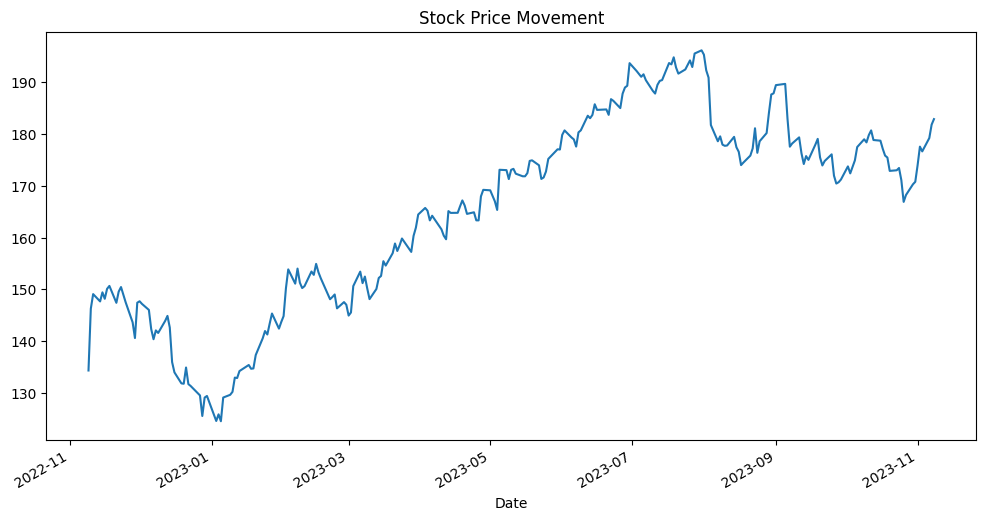

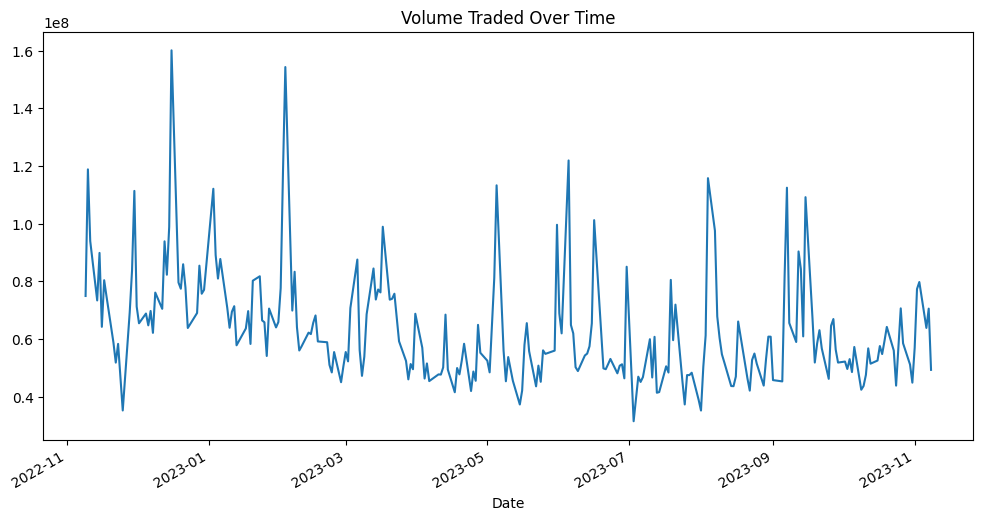

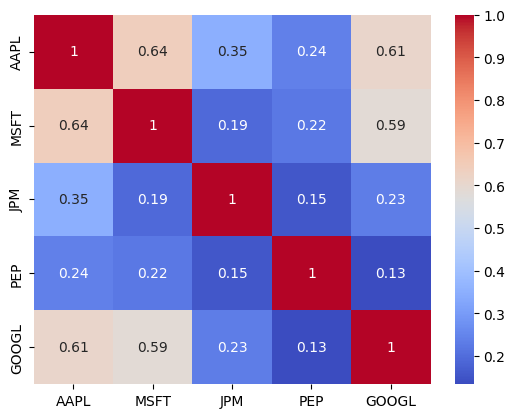

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd

# Replace the following list with your desired stock symbols
stock_list = ["AAPL", "MSFT", "JPM", "PEP", "GOOGL"]
close_prices = pd.DataFrame()

for stock in stock_list:
    close_prices[stock] = yf.Ticker(stock).history(period="1y")['Close']

# Visualize stock price movements
data['Close'].plot(figsize=(12, 6), title="Stock Price Movement")
plt.show()

# Analyze volume of stocks traded
data['Volume'].plot(figsize=(12, 6), title="Volume Traded Over Time")
plt.show()

# Correlation between stocks
correlation = close_prices.pct_change().corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


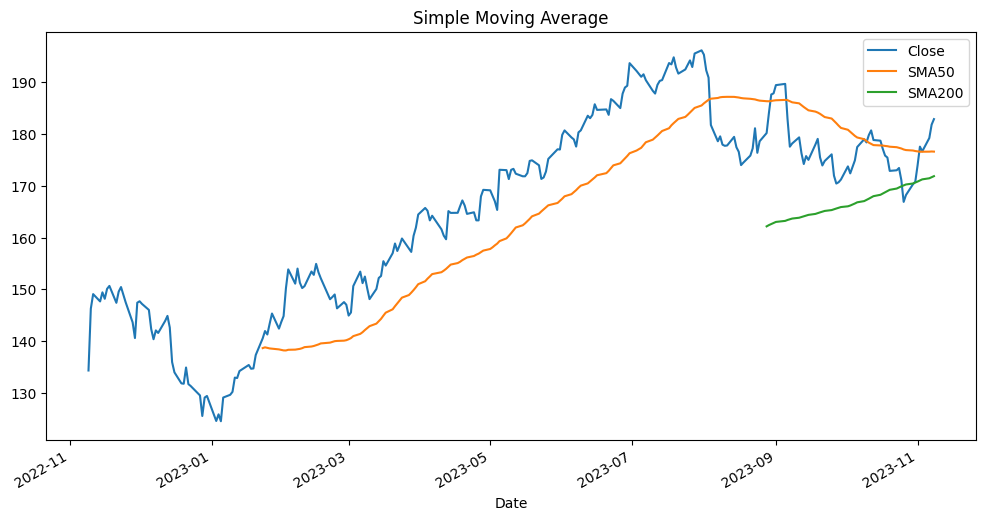

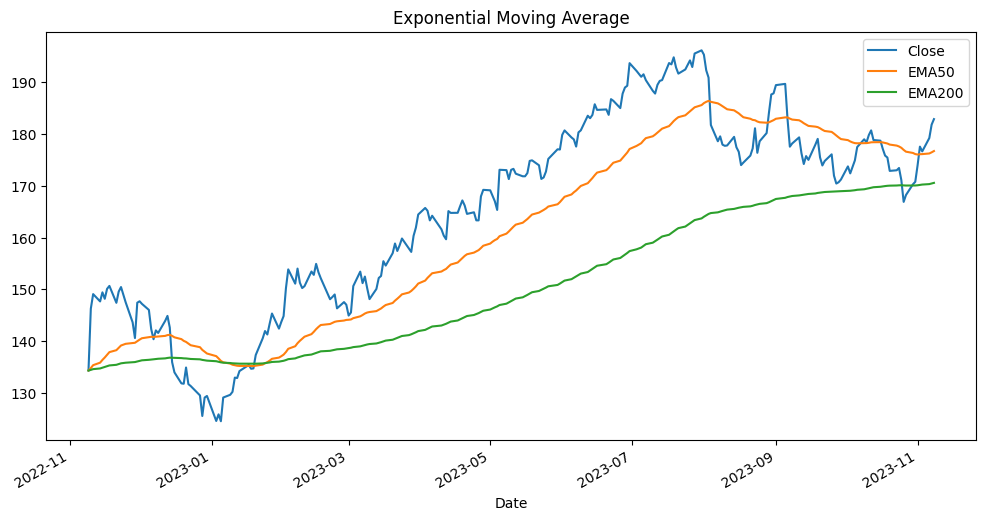

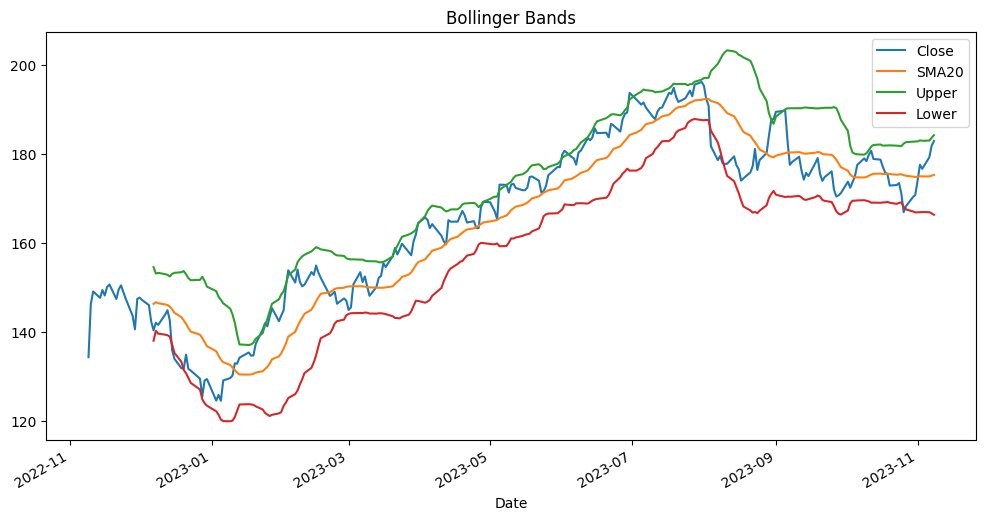

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Assuming 'data' is the DataFrame containing historical stock data

# Simple Moving Average (SMA)
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()
data[['Close', 'SMA50', 'SMA200']].plot(figsize=(12, 6))
plt.title('Simple Moving Average')
plt.show()

# Exponential Moving Average (EMA)
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()
data[['Close', 'EMA50', 'EMA200']].plot(figsize=(12, 6))
plt.title('Exponential Moving Average')
plt.show()

# Bollinger Bands
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['Upper'] = data['SMA20'] + 2 * data['Close'].rolling(window=20).std()
data['Lower'] = data['SMA20'] - 2 * data['Close'].rolling(window=20).std()
data[['Close', 'SMA20', 'Upper', 'Lower']].plot(figsize=(12, 6))
plt.title('Bollinger Bands')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


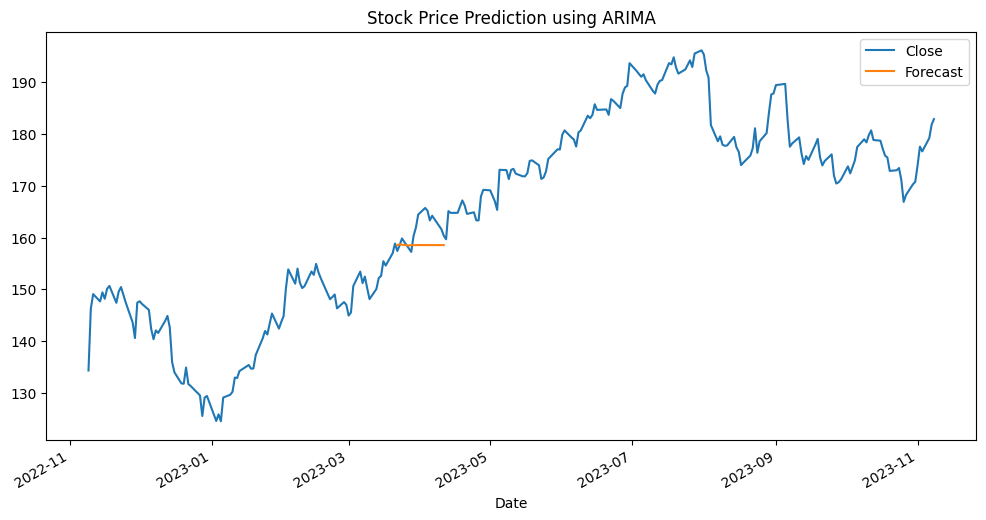

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' is the DataFrame containing historical stock data

# Fitting the ARIMA model
model = ARIMA(data['Close'], order=(5, 1, 0))
results = model.fit()

# Generating forecast
forecast = results.predict(start=90, end=103, dynamic=True)

# Adding the forecast to the 'data' DataFrame
data['Forecast'] = forecast

# Plotting the results
data[['Close', 'Forecast']].plot(figsize=(12, 6))
plt.title('Stock Price Prediction using ARIMA')
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Assuming stock_list contains the symbols of the stocks in the portfolio
returns = close_prices.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 10000
risk_free_rate = 0.0178  # example value

# Portfolio optimization function
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

# Minimize negative Sharpe Ratio to get optimal portfolio
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

# Constraints for optimization
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Running the optimization
initial = [1. / len(stock_list) for stock in stock_list]
bounds = tuple((0, 1) for asset in range(len(stock_list)))
result = minimize(neg_sharpe_ratio, initial, args=(mean_returns, cov_matrix, risk_free_rate), bounds=bounds, constraints=constraints)

# Printing the optimized portfolio weights
print(result.x)


[3.24862868e-17 6.90249764e-01 1.55139766e-01 0.00000000e+00
 1.54610470e-01]
